In [1]:
!git clone https://github.com/benzaked/RecsFinalProject21.git
# maybe remove when moving to .py

Cloning into 'RecsFinalProject21'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 68 (delta 14), reused 65 (delta 11), pack-reused 0
Unpacking objects: 100% (68/68), done.


In [2]:
import sys
import os
py_file_location = "/content/RecsFinalProject21"
sys.path.append(os.path.abspath(py_file_location))
# remove after moving to .py

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Recommendation System 2021/Final project'

In [5]:
!unzip '/content/drive/MyDrive/Recommendation System 2021/Final project/predictions.zip'

Archive:  /content/drive/MyDrive/Recommendation System 2021/Final project/predictions.zip
   creating: predictions/
   creating: predictions/NAIS/
   creating: predictions/NAIS/ml-1m/
   creating: predictions/NAIS/ml-1m/16-prod/
  inflating: predictions/NAIS/ml-1m/16-prod/predictions.csv  
   creating: predictions/NAIS/ml-1m/32-prod/
  inflating: predictions/NAIS/ml-1m/32-prod/predictions.csv  
   creating: predictions/NAIS/ml-1m/64-prod/
  inflating: predictions/NAIS/ml-1m/64-prod/predictions.csv  
   creating: predictions/NAIS/pinterest-20/
   creating: predictions/NAIS/pinterest-20/16-prod/
  inflating: predictions/NAIS/pinterest-20/16-prod/predictions.csv  
   creating: predictions/NAIS/pinterest-20/32-prod/
  inflating: predictions/NAIS/pinterest-20/32-prod/predictions.csv  
   creating: predictions/NAIS/pinterest-20/64-prod/
  inflating: predictions/NAIS/pinterest-20/64-prod/predictions.csv  


In [6]:
import pandas as pd
import evaluate
import re
import matplotlib.pyplot as plt

In [7]:
path_unziped = '/content/predictions/NAIS'

# prdiction read data

# Nais predictions

In [121]:
ml_16 = pd.read_csv(f'{path_unziped}/ml-1m/16-prod/predictions.csv')
ml_32 = pd.read_csv(f'{path_unziped}/ml-1m/32-prod/predictions.csv')
ml_64 = pd.read_csv(f'{path_unziped}/ml-1m/64-prod/predictions.csv')
pint_16 = pd.read_csv(f'{path_unziped}/pinterest-20/16-prod/predictions.csv') 
pint_32 = pd.read_csv(f'/content/drive/MyDrive/Recommendation System 2021/Final project/predictions pint 32.csv') 
pint_64 = pd.read_csv(f'{path_unziped}/pinterest-20/64-prod/predictions.csv')

# explainable models predictions

In [122]:
path_to_explainable = '/content/drive/MyDrive/Recommendation System 2021/Final project'

In [123]:
#ml-1m
user_user_ml = pd.read_csv(f'{path_to_explainable}/ml-1m/user_user.csv')
item_item_ml = pd.read_csv(f'{path_to_explainable}/ml-1m/item_item3.csv')
content_ml = pd.read_csv(f'{path_to_explainable}/ml-1m/content_predictions.csv')
popularity_ml = ['104', '124', '64', '113', '97', '132', '128', '189', '127', '92', '134', '246', '116', '60', '184', '669', '167', '171', '273', '244']
#pinterest
user_user_pint = pd.read_csv(f'{path_to_explainable}/pinterest/user_user.csv')
item_item_pint = pd.read_csv(f'{path_to_explainable}/pinterest/item_item.csv')
popularity_pint = ['487','442','773','13','3831','485','15','3008','1035','4275','4294','769','775','2242',
                   '1259','5933','817','877','2228','809']

# compare predictions

In [132]:
#convert lists of scores to dict of scores types
def Convert(lst, names=['NAIS_16', 'NAIS_32','NAIS_64',
                        'user_user','item_item','content','popularity']):
    res_dct = {names[i]: lst[i] for i in range(len(lst))}
    return res_dct

### ML

In [12]:
all_models_ml = [ml_16,ml_32,ml_64, user_user_ml,item_item_ml,content_ml,popularity_ml ]

#### top 10

In [13]:
topN = 10

In [14]:
ml_16_scores = []
ml_32_scores = []
ml_64_scores = []
user_user_scores = []
item_item_scores = []
content_scores = []
popularity_scores = []
all_scores = [ml_16_scores, ml_32_scores, ml_64_scores,
             user_user_scores, item_item_scores, 
            content_scores, popularity_scores]
for i in range(len(all_scores)):
  if i == 6:
    all_scores[i] = all_models_ml[i-1].apply(lambda user: evaluate.evaluate(all_models_ml[i][:topN], user['ranked_item']), 1)
  else:
    all_models_ml[i]['predicted_list'] = all_models_ml[i]['predicted_list'].apply(lambda x : x.replace(',',''))
    all_models_ml[i]['predicted_list'] = all_models_ml[i]['predicted_list'].apply(lambda x : re.sub(r'[\[\]]', '',x).split())
    all_models_ml[i]['ranked_item'] = all_models_ml[i]['ranked_item'].apply(lambda x : str(x))
    all_scores[i] = all_models_ml[i].apply(lambda user: evaluate.evaluate(user['predicted_list'][:topN],user['ranked_item']), 1)
  all_scores[i] = pd.DataFrame(list(zip(*all_scores[i]))).T
  all_scores[i].columns = [f'HR@{topN}', f'NDCG@{topN}', f'MRR@{topN}']
  all_scores[i] = all_scores[i].mean()

In [20]:
dict_of_scores_df = Convert(all_scores)

In [21]:
dict_of_scores_df

{'NAIS_16': HR@10      0.670033
 NDCG@10    0.396771
 MRR@10     0.312527
 dtype: float64, 'NAIS_32': HR@10      0.692881
 NDCG@10    0.421394
 MRR@10     0.337487
 dtype: float64, 'NAIS_64': HR@10      0.690894
 NDCG@10    0.420463
 MRR@10     0.337051
 dtype: float64, 'content': HR@10      0.357616
 NDCG@10    0.191567
 MRR@10     0.141127
 dtype: float64, 'item_item': HR@10      0.548013
 NDCG@10    0.267889
 MRR@10     0.183081
 dtype: float64, 'popularity': HR@10      0.021358
 NDCG@10    0.010405
 MRR@10     0.007178
 dtype: float64, 'user_user': HR@10      0.632119
 NDCG@10    0.389417
 MRR@10     0.314256
 dtype: float64}

In [24]:
pd.DataFrame(dict_of_scores_df).to_latex(float_format="%.2f")

'\\begin{tabular}{lrrrrrrr}\n\\toprule\n{} &  NAIS\\_16 &  NAIS\\_32 &  NAIS\\_64 &  user\\_user &  item\\_item &  content &  popularity \\\\\n\\midrule\nHR@10   &     0.67 &     0.69 &     0.69 &       0.63 &       0.55 &     0.36 &        0.02 \\\\\nNDCG@10 &     0.40 &     0.42 &     0.42 &       0.39 &       0.27 &     0.19 &        0.01 \\\\\nMRR@10  &     0.31 &     0.34 &     0.34 &       0.31 &       0.18 &     0.14 &        0.01 \\\\\n\\bottomrule\n\\end{tabular}\n'

Text(0, 0.5, 'score')

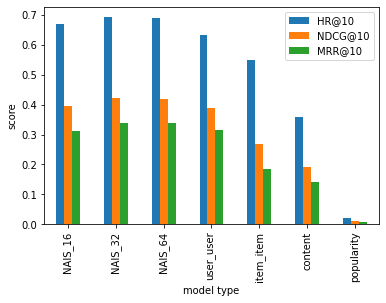

In [25]:
plot_top10 = pd.DataFrame.from_dict(dict_of_scores_df, orient='index').plot(kind='bar')
plot_top10.set_xlabel("model type")
plot_top10.set_ylabel("score")

#### top 20

In [26]:
topN = 20

In [27]:
ml_16_scores = []
ml_32_scores = []
ml_64_scores = []
user_user_scores = []
item_item_scores = []
content_scores = []
popularity_scores = []
all_scores = [ml_16_scores, ml_32_scores, ml_64_scores,
             user_user_scores, item_item_scores, 
            content_scores, popularity_scores]
for i in range(len(all_scores)):
  if i == 6:
    all_scores[i] = all_models_ml[i-1].apply(lambda user: evaluate.evaluate(all_models_ml[i][:topN], user['ranked_item']), 1)
  else:
    all_scores[i] = all_models_ml[i].apply(lambda user: evaluate.evaluate(user['predicted_list'][:topN],user['ranked_item']), 1)
  all_scores[i] = pd.DataFrame(list(zip(*all_scores[i]))).T
  all_scores[i].columns = [f'HR@{topN}', f'NDCG@{topN}', f'MRR@{topN}']
  all_scores[i] = all_scores[i].mean()

In [28]:
dict_of_scores_df = Convert(all_scores)

Text(0, 0.5, 'score')

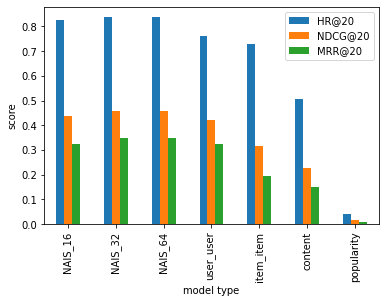

In [29]:
plot_top20 = pd.DataFrame.from_dict(dict_of_scores_df, orient='index',).plot(kind='bar')
plot_top20.set_xlabel("model type")
plot_top20.set_ylabel("score")

### Pinterest

In [124]:
all_models_pint = [pint_16,pint_32,pint_64, user_user_pint,item_item_pint,
                  popularity_pint ]

#### top 10

In [125]:
topN = 10

In [126]:
pint_16_scores = []
pint_32_scores = []
pint_64_scores = []
user_user_scores = []
item_item_scores = []
popularity_scores = []
all_scores = [pint_16_scores, pint_32_scores, pint_64_scores,
             user_user_scores, item_item_scores, popularity_scores]
for i in range(len(all_scores)):
  if i == 5:
    all_scores[i] = all_models_pint[i-1].apply(lambda user: evaluate.evaluate(all_models_pint[i][:topN], user['ranked_item']), 1)
  else:
    all_models_pint[i]['predicted_list'] = all_models_pint[i]['predicted_list'].apply(lambda x : x.replace(',',''))
    all_models_pint[i]['predicted_list'] = all_models_pint[i]['predicted_list'].apply(lambda x : re.sub(r'[\[\]]', '',x).split())
    all_models_pint[i]['ranked_item'] = all_models_pint[i]['ranked_item'].apply(lambda x : str(x))
    all_scores[i] = all_models_pint[i].apply(lambda user: evaluate.evaluate(user['predicted_list'][:topN],user['ranked_item']), 1)
  all_scores[i] = pd.DataFrame(list(zip(*all_scores[i]))).T
  all_scores[i].columns = [f'HR@{topN}', f'NDCG@{topN}', f'MRR@{topN}']
  all_scores[i] = all_scores[i].mean()

/content/RecsFinalProject21/evaluate.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  pos = np.where(rank_list_np == gtItem)
/content/RecsFinalProject21/evaluate.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  pos = np.where(rank_list_np == gtItem)


In [133]:
dict_of_scores_df = Convert(all_scores,names=['NAIS_16', 'NAIS_32','NAIS_64',
                        'user_user','item_item','popularity'])

In [134]:
pd.DataFrame(dict_of_scores_df).to_latex(float_format="%.2f")

'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &  NAIS\\_16 &  NAIS\\_32 &  NAIS\\_64 &  user\\_user &  item\\_item &  popularity \\\\\n\\midrule\nHR@10   &     0.87 &     0.88 &     0.87 &       0.78 &       0.84 &        0.01 \\\\\nNDCG@10 &     0.56 &     0.56 &     0.56 &       0.52 &       0.52 &        0.00 \\\\\nMRR@10  &     0.46 &     0.46 &     0.46 &       0.44 &       0.42 &        0.00 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [135]:
dict_of_scores_df

{'NAIS_16': HR@10      0.872271
 NDCG@10    0.556011
 MRR@10     0.457005
 dtype: float64, 'NAIS_32': HR@10      0.875895
 NDCG@10    0.558193
 MRR@10     0.458704
 dtype: float64, 'NAIS_64': HR@10      0.873757
 NDCG@10    0.558480
 MRR@10     0.459850
 dtype: float64, 'item_item': HR@10      0.836284
 NDCG@10    0.515896
 MRR@10     0.415596
 dtype: float64, 'popularity': HR@10      0.007121
 NDCG@10    0.003792
 MRR@10     0.002811
 dtype: float64, 'user_user': HR@10      0.783210
 NDCG@10    0.519183
 MRR@10     0.435936
 dtype: float64}

Text(0, 0.5, 'score')

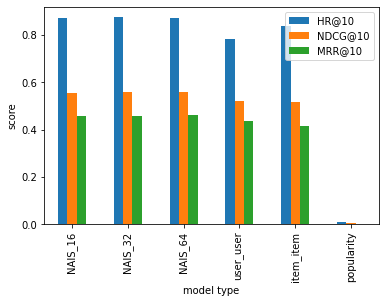

In [136]:
plot_top10 = pd.DataFrame.from_dict(dict_of_scores_df, orient='index').plot(kind='bar')
plot_top10.set_xlabel("model type")
plot_top10.set_ylabel("score")

#### top 20

In [21]:
topN = 20

In [22]:
pint_16_scores = []
pint_32_scores = []
pint_64_scores = []
user_user_scores = []
item_item_scores = []
popularity_scores = []
all_scores = [pint_16_scores, pint_32_scores, pint_64_scores,
             user_user_scores, item_item_scores, popularity_scores]
for i in range(len(all_scores)):
  if i == 5:
    all_scores[i] = all_models_pint[i-1].apply(lambda user: evaluate.evaluate(all_models_pint[i][:topN], user['ranked_item']), 1)
  else:
    all_scores[i] = all_models_pint[i].apply(lambda user: evaluate.evaluate(user['predicted_list'][:topN],user['ranked_item']), 1)
  all_scores[i] = pd.DataFrame(list(zip(*all_scores[i]))).T
  all_scores[i].columns = [f'HR@{topN}', f'NDCG@{topN}', f'MRR@{topN}']
  all_scores[i] = all_scores[i].mean()

/content/RecsFinalProject21/evaluate.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  pos = np.where(rank_list_np == gtItem)
/content/RecsFinalProject21/evaluate.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  pos = np.where(rank_list_np == gtItem)


In [23]:
dict_of_scores_df = Convert(all_scores,names=['nais_16', 'nais_32','nais_64',
                        'user_user','item_item','popularity'])

In [24]:
dict_of_scores_df

{'item_item': HR@20      0.889594
 NDCG@20    0.529896
 MRR@20     0.419714
 dtype: float64, 'nais_16': HR@20      0.964194
 NDCG@20    0.579628
 MRR@20     0.463683
 dtype: float64, 'nais_32': HR@20      0.965698
 NDCG@20    0.581295
 MRR@20     0.465254
 dtype: float64, 'nais_64': HR@20      0.965898
 NDCG@20    0.582161
 MRR@20     0.466552
 dtype: float64, 'popularity': HR@20      0.0
 NDCG@20    0.0
 MRR@20     0.0
 dtype: float64, 'user_user': HR@20      0.816515
 NDCG@20    0.528026
 MRR@20     0.438587
 dtype: float64}

Text(0, 0.5, 'score')

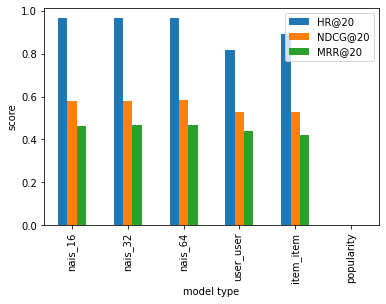

In [25]:
plot_top20 = pd.DataFrame.from_dict(dict_of_scores_df, orient='index',).plot(kind='bar')
plot_top20.set_xlabel("model type")
plot_top20.set_ylabel("score")

## reordered

### NAIS - 16 embedding size

#### read and fix tables

In [99]:
reorderd_ml = pd.read_csv('/content/drive/MyDrive/Recommendation System 2021/Final project/re_orederd_ml_16_with_avg.csv')
ml_16 = pd.read_csv(f'{path_unziped}/ml-1m/16-prod/predictions.csv')
ml_16['ranked_item'] = ml_16['ranked_item'].apply(lambda x : str(x))

reorderd_pint = pd.read_csv('/content/drive/MyDrive/Recommendation System 2021/Final project/pinterest/re_ordered.csv')
pint_16 = pd.read_csv(f'{path_unziped}/pinterest-20/16-prod/predictions.csv') 
pint_16['ranked_item'] = pint_16['ranked_item'].apply(lambda x : str(x))

####ml

In [100]:
content_model = pd.DataFrame(reorderd_ml['content_firs'])
larger_model = pd.DataFrame(reorderd_ml['larger_size_order_list'])
user_preferance = pd.DataFrame(reorderd_ml['user_preferance'])
user_preferance_avg =  pd.DataFrame(reorderd_ml['user_preferance_avg'])

content_model.columns = ['predicted_list']
larger_model.columns = ['predicted_list']
user_preferance.columns = ['predicted_list']
user_preferance_avg.columns = ['predicted_list']

content_model['ranked_item'] = ml_16['ranked_item'] 
larger_model['ranked_item']  = ml_16['ranked_item'] 
user_preferance['ranked_item']  = ml_16['ranked_item'] 
user_preferance_avg['ranked_item']  = ml_16['ranked_item'] 

In [101]:
topN = 10

In [102]:
names = ['content first','larger first','user preference','user preference avg','NAIS_16']

In [103]:
all_models_ml  = [content_model,larger_model,user_preferance,user_preferance_avg,ml_16]

In [104]:
content_scores = []
larger_scores = []
user_pref_scores = []
user_pref_avg_scores = []
nais_16_scores = []

all_scores = [content_scores,larger_scores,user_pref_scores,nais_16_scores,nais_16_scores]
for i in range(len(all_scores)):
  all_models_ml[i]['predicted_list'] = all_models_ml[i]['predicted_list'].apply(lambda x : x.replace(',',''))
  all_models_ml[i]['predicted_list'] = all_models_ml[i]['predicted_list'].apply(lambda x : re.sub(r'[\[\]]', '',x).split())
  all_scores[i] = all_models_ml[i].apply(lambda user: evaluate.evaluate(user['predicted_list'][:topN], user['ranked_item']),1)
  all_scores[i] = pd.DataFrame(list(zip(*all_scores[i]))).T
  all_scores[i].columns = [f'HR@{topN}', f'NDCG@{topN}', f'MRR@{topN}']
  all_scores[i] = all_scores[i].mean()

In [105]:
dict_of_scores_df = Convert(all_scores,names)

In [106]:
pd.DataFrame(dict_of_scores_df).to_latex(float_format="%.2f")

'\\begin{tabular}{lrrrrr}\n\\toprule\n{} &  content first &  larger first &  user preference &  user preference avg &  NAIS\\_16 \\\\\n\\midrule\nHR@10   &           0.62 &          0.57 &             0.63 &                 0.63 &     0.67 \\\\\nNDCG@10 &           0.28 &          0.32 &             0.38 &                 0.36 &     0.40 \\\\\nMRR@10  &           0.18 &          0.25 &             0.30 &                 0.28 &     0.31 \\\\\n\\bottomrule\n\\end{tabular}\n'

Text(0, 0.5, 'score')

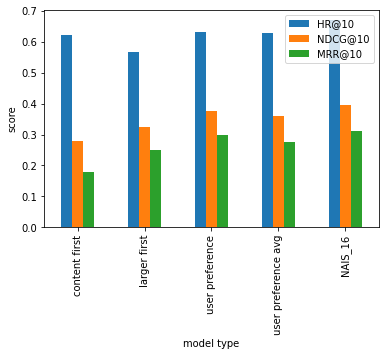

In [107]:
plot_top10 = pd.DataFrame.from_dict(dict_of_scores_df, orient='index',).plot(kind='bar')
plot_top10.set_xlabel("model type")
plot_top10.set_ylabel("score")

####pinterest

In [108]:
larger_model = pd.DataFrame(reorderd_pint['larger_size_order_list'])
user_preferance = pd.DataFrame(reorderd_pint['user_preferance'])
user_preferance_avg =  pd.DataFrame(reorderd_pint['user_preferance_avg'])

larger_model.columns = ['predicted_list']
user_preferance.columns = ['predicted_list']
user_preferance_avg.columns = ['predicted_list']

larger_model['ranked_item']  = pint_16['ranked_item'] 
user_preferance['ranked_item']  = pint_16['ranked_item'] 
user_preferance_avg['ranked_item']  = pint_16['ranked_item'] 

In [109]:
names = ['larger first','user preference','user preference avg','NAIS_16']

In [110]:
all_models_pint  = [larger_model,user_preferance,user_preferance_avg, pint_16]

In [111]:
larger_scores = []
user_pref_scores = []
user_pref_avg_scores = []
nais_16_scores = []

all_scores = [larger_scores, user_pref_scores, user_preferance_avg, nais_16_scores]
for i in range(len(all_scores)):
  all_models_pint[i]['predicted_list'] = all_models_pint[i]['predicted_list'].apply(lambda x : x.replace(',',''))
  all_models_pint[i]['predicted_list'] = all_models_pint[i]['predicted_list'].apply(lambda x : re.sub(r'[\[\]]', '',x).split())
  all_scores[i] = all_models_pint[i].apply(lambda user: evaluate.evaluate(user['predicted_list'][:topN], user['ranked_item']),1)
  all_scores[i] = pd.DataFrame(list(zip(*all_scores[i]))).T
  all_scores[i].columns = [f'HR@{topN}', f'NDCG@{topN}', f'MRR@{topN}']
  all_scores[i] = all_scores[i].mean()

In [112]:
dict_of_scores_df = Convert(all_scores,names)

In [113]:
pd.DataFrame(dict_of_scores_df).to_latex(float_format="%.2f")

'\\begin{tabular}{lrrrr}\n\\toprule\n{} &  larger first &  user preference &  user preference avg &  NAIS\\_16 \\\\\n\\midrule\nHR@10   &          0.63 &             0.86 &                 0.87 &     0.87 \\\\\nNDCG@10 &          0.40 &             0.55 &                 0.55 &     0.56 \\\\\nMRR@10  &          0.32 &             0.45 &                 0.45 &     0.46 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [114]:
pd.DataFrame(dict_of_scores_df)

,larger first,user preference,user preference avg,NAIS_16
HR@10,0.632250,0.856814,0.866128,0.872271
NDCG@10,0.395514,0.549689,0.549421,0.556011
MRR@10,0.321643,0.453456,0.450169,0.457005


Text(0, 0.5, 'score')

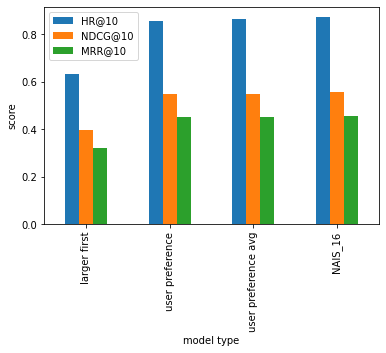

In [115]:
plot_top10 = pd.DataFrame.from_dict(dict_of_scores_df, orient='index',).plot(kind='bar')
plot_top10.set_xlabel("model type")
plot_top10.set_ylabel("score")